In [1]:
import matplotlib.pyplot as matplt
import matplotlib.image as matimg
import numpy as np
from scipy.misc import imresize

%matplotlib inline

import os
from os import listdir
from os.path import isfile , join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


In [3]:
#SHOPRTTE NIGERIA n Tweets
import pandas as pd
# We create a pandas dataframe as follows:
data = pd.read_csv('vpdebate2_original - vpdebate2_original.csv')

# We display the first 10 elements of the dataframe:
display(data.head(10))

,created_at,retweet_count,source,text
0,2018-12-17 13:33:29,0,Twitter for Android,"Mr Peter Obi remembered me of this words\n\n""H..."
1,2018-12-17 13:30:22,91,Twitter for Android,RT @The_Jonathanian: They put their best foot ...
2,2018-12-17 13:28:45,728,Twitter for Android,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P..."
3,2018-12-17 13:26:51,416,Twitter for Android,RT @HEDankwambo: Our Vice Presidential Candida...
4,2018-12-17 13:23:21,176,Twitter for Android,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete..."
5,2018-12-17 13:18:54,2654,Twitter for Android,RT @segalink: “Major cause of Poverty is Corru...
6,2018-12-17 13:15:46,6,Twitter for Android,RT @Abazz_bdxpr: Peter Obi speaking sense #VPD...
7,2018-12-17 13:14:13,176,Twitter for Android,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete..."
8,2018-12-17 13:13:31,176,Twitter for iPhone,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete..."
9,2018-12-17 13:12:00,2654,Twitter for Android,RT @segalink: “Major cause of Poverty is Corru...


In [4]:
# Internal methods of a single tweet object:
print(dir(data['text']))

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__

In [5]:
# We obtain all possible sources:
sources = []
for source in data['source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter for iPhone
* Hootsuite Inc.
* Twitter Web Client
* Twitter Lite
* UberSocial for Android
* Mobile Web (M2)
* TweetDeck
* Twitter for iPad
* Twitter for BlackBerry
* Facebook
* Instagram
* nan


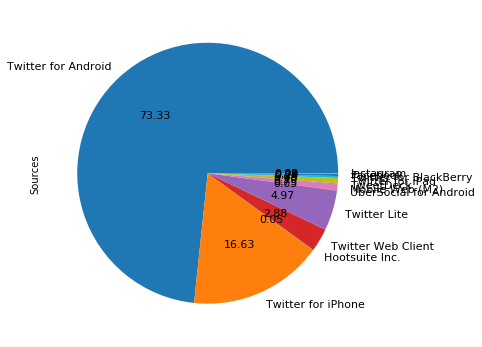

In [6]:
import numpy as np
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [7]:
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to year-month
def convertUTCtoYearMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# convert to year + week of year
def convertUTCtoYearWeekNumber(date):
    utc = arrow.get(date)
    year = utc.to('US/Eastern').format('YYYY')
    weekno = int(date.strftime('%U'))
    return str(year) + '-' + str(weekno).zfill(2)
#     return int(str(year) + str(weekno).zfill(2))

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

In [8]:
data['created_at'] = pd.to_datetime(data['created_at'])
#tweets['d'] = tweets['Id']
data.text.fillna(data.text, inplace=True)

In [12]:
data['human_date'] = data['created_at'].apply(convertUTCtoFull)
data['month/day'] = data['created_at'].apply(convertUTCtoMonthDay)
data['year'] = data['created_at'].apply(convertUTCtoYear)
data['month'] = data['created_at'].apply(convertUTCtoMonth)
data['year_month'] = data['created_at'].apply(convertUTCtoYearMonth)
data['day'] = data['created_at'].apply(convertUTCtoDay)
data['day of week'] = data['created_at'].apply(convertUTCtoDayOfWeek)
data['hour'] = data['created_at'].apply(convertUTCtoHourOfDay)
data['week'] = data['created_at'].apply(convertUTCtoWeekNumber) 
data['year_week'] = data['created_at'].apply(convertUTCtoYearWeekNumber)
#data['text_encoded'] = data['text'].apply(encodeText)
data.set_index('created_at', inplace=True)

data.head()

,retweet_count,source,text,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week
created_at,,,,,,,,,,,,,
2018-12-17 13:33:29,0,Twitter for Android,"Mr Peter Obi remembered me of this words\n\n""H...","Monday, Dec 17, 2018 8:33 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:30:22,91,Twitter for Android,RT @The_Jonathanian: They put their best foot ...,"Monday, Dec 17, 2018 8:30 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:28:45,728,Twitter for Android,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...","Monday, Dec 17, 2018 8:28 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:26:51,416,Twitter for Android,RT @HEDankwambo: Our Vice Presidential Candida...,"Monday, Dec 17, 2018 8:26 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:23:21,176,Twitter for Android,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...","Monday, Dec 17, 2018 8:23 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50


In [10]:
!pip install agate
!pip install vaderSentiment
!pip install arrow

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
import agate
import warnings
import requests
import zipfile
import io
import json
import unicodedata
import arrow


C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


In [13]:
data['source'].value_counts()

Twitter for Android       1504
Twitter for iPhone         341
Twitter Lite               102
Twitter Web Client          59
Mobile Web (M2)             15
Twitter for iPad            14
Facebook                     6
Twitter for BlackBerry       5
TweetDeck                    2
Hootsuite Inc.               1
Instagram                    1
UberSocial for Android       1
Name: source, dtype: int64

In [14]:
data

,retweet_count,source,text,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week
created_at,,,,,,,,,,,,,
2018-12-17 13:33:29,0,Twitter for Android,"Mr Peter Obi remembered me of this words\n\n""H...","Monday, Dec 17, 2018 8:33 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:30:22,91,Twitter for Android,RT @The_Jonathanian: They put their best foot ...,"Monday, Dec 17, 2018 8:30 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:28:45,728,Twitter for Android,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...","Monday, Dec 17, 2018 8:28 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:26:51,416,Twitter for Android,RT @HEDankwambo: Our Vice Presidential Candida...,"Monday, Dec 17, 2018 8:26 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:23:21,176,Twitter for Android,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...","Monday, Dec 17, 2018 8:23 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:18:54,2654,Twitter for Android,RT @segalink: “Major cause of Poverty is Corru...,"Monday, Dec 17, 2018 8:18 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:15:46,6,Twitter for Android,RT @Abazz_bdxpr: Peter Obi speaking sense #VPD...,"Monday, Dec 17, 2018 8:15 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:14:13,176,Twitter for Android,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...","Monday, Dec 17, 2018 8:14 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50
2018-12-17 13:13:31,176,Twitter for iPhone,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...","Monday, Dec 17, 2018 8:13 AM",2018-12-17,2018,12,2018-12,17,1,8,50,2018-50


In [15]:
train = pd.read_csv('vpdebate2_original - vpdebate2_original.csv')

In [16]:
train.describe()

,retweet_count
count,2052.000000
mean,476.532164
std,798.538389
min,0.000000
25%,62.000000
50%,176.000000
75%,263.000000
max,8107.000000


In [17]:
train.columns

Index(['created_at', 'retweet_count', 'source', 'text'], dtype='object')

<b>Number of Words</b></br>
One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function in python:

In [18]:
train['word_count'] = train['text'].apply(lambda x: len(str(x).split(" ")))
train[['text','word_count']].head()

,text,word_count
0,"Mr Peter Obi remembered me of this words\n\n""H...",23
1,RT @The_Jonathanian: They put their best foot ...,20
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",22
3,RT @HEDankwambo: Our Vice Presidential Candida...,21
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",21


<b>Number of characters</b></br>
This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet. This is done by calculating the length of the tweet.

In [19]:
train['char_count'] = train['text'].str.len() ## this also includes spaces
train[['text','char_count']].head()

,text,char_count
0,"Mr Peter Obi remembered me of this words\n\n""H...",140.0
1,RT @The_Jonathanian: They put their best foot ...,140.0
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",140.0
3,RT @HEDankwambo: Our Vice Presidential Candida...,139.0
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",140.0


In [20]:
train[['text','char_count','word_count']].head()

,text,char_count,word_count
0,"Mr Peter Obi remembered me of this words\n\n""H...",140.0,23
1,RT @The_Jonathanian: They put their best foot ...,140.0,20
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",140.0,22
3,RT @HEDankwambo: Our Vice Presidential Candida...,139.0,21
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",140.0,21


<b>Average Word Length</b></br>
We will also extract another feature which will calculate the average word length of each tweet. This can also potentially help us in improving our model.

Here, we simply take the sum of the length of all the words and divide it by the total length of the tweet

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 6 columns):
created_at       2051 non-null object
retweet_count    2051 non-null int64
source           2051 non-null object
text             2051 non-null object
word_count       2051 non-null int64
char_count       2051 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 112.2+ KB


In [32]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['text'].apply(lambda x: avg_word(x))
train[['text','avg_word']].head()

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text,avg_word
0,"Mr Peter Obi remembered me of this words\n\n""H...",4.833333
1,RT @The_Jonathanian: They put their best foot ...,5.086957
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",5.409091
3,RT @HEDankwambo: Our Vice Presidential Candida...,5.666667
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",4.956522


<b>Number of stopwords</b></br>
Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

Here, we have imported stopwords from NLTK, which is a basic NLP library in python.



In [22]:
import nltk
nltk.download('stopwords')

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\importlib\_bootstrap_external.py:434: ImportWarning: Not importing directory C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\orangecontrib: missing __init__
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\importlib\_bootstrap_external.py:434: ImportWarning: Not importing directory c:\users\ahmed olanrewaju\anaconda3\lib\site-packages\orangecontrib: missing __init__
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\importlib

[nltk_data] Downloading package stopwords to C:\Users\Ahmed
[nltk_data]     Olanrewaju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['text','stopwords']].head()

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\corpus\reader\wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Ahmed Olanrewaju\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english'>
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text,stopwords
0,"Mr Peter Obi remembered me of this words\n\n""H...",6
1,RT @The_Jonathanian: They put their best foot ...,3
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",5
3,RT @HEDankwambo: Our Vice Presidential Candida...,6
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",8


<b>Number of special characters</b></br>
One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

Here, we make use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [34]:
train['hastags'] = train['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['text','hastags']].head()

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text,hastags
0,"Mr Peter Obi remembered me of this words\n\n""H...",0
1,RT @The_Jonathanian: They put their best foot ...,0
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",0
3,RT @HEDankwambo: Our Vice Presidential Candida...,1
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",1


<b>Number of numerics</b></br>
Just like we calculated the number of words, we can also calculate the number of numerics which are present in the tweets. It does not have a lot of use in our example, but this is still a useful feature that should be run while doing similar exercises. For example, 

In [35]:
train['numerics'] = train['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['text','numerics']].head()

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text,numerics
0,"Mr Peter Obi remembered me of this words\n\n""H...",0
1,RT @The_Jonathanian: They put their best foot ...,0
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",0
3,RT @HEDankwambo: Our Vice Presidential Candida...,0
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",0


<b>Number of Uppercase words</b></br>
Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [36]:
train['upper'] = train['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['text','upper']].head()

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text,upper
0,"Mr Peter Obi remembered me of this words\n\n""H...",0
1,RT @The_Jonathanian: They put their best foot ...,1
2,"RT @Mr_JAGs: FLASH: VP Candidate of the PDP, P...",6
3,RT @HEDankwambo: Our Vice Presidential Candida...,1
4,"RT @JackObinyan: Pity him I beg... :)\n\n""Pete...",2


### Describe Number of Hashtags Used 

In [37]:
train['hastags'].describe()

count    2051.000000
mean        0.886884
std         0.927035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: hastags, dtype: float64

In [38]:
train['hastags'].head()

0    0
1    0
2    0
3    1
4    1
Name: hastags, dtype: int64

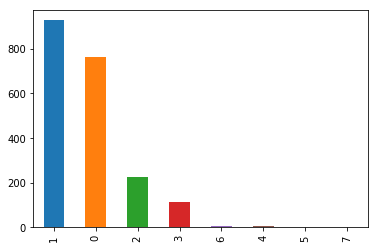

In [39]:
train['hastags'].value_counts().plot(kind='bar')

In [40]:
train['hastags'].value_counts()

1    927
0    765
2    225
3    115
6      7
4      7
5      4
7      1
Name: hastags, dtype: int64

In [41]:
hashtag_list_v2 = []     #CREATE EMPTY LIST 
for i in train.text:           #LOOP OVER ITEMS IN 'S'
    hashtag = filter(lambda x: x.startswith('#'),i.split()) 
    hashtag = map(lambda x: x.strip('/;,-.:!?"''()'),hashtag)  ##remove the indicated punctuations
    hashtag = map(lambda x: x.strip(),hashtag)    #STRIP REMOVES 
    hashtag = map(lambda x: x.lower(),hashtag)    #IF WE WANT LOWER CASE TAGS (OTHERWISE, COUNT IS CASE SENSITIVE)
    hashtag_list_v2.extend(hashtag)  
print (len(hashtag_list_v2))
hashtag_list_v2[:20]

1819


['#vpdebate',
 '#…',
 '#nedg',
 '#bon',
 '#vpdebate',
 '#vpdebate',
 '#2019debate',
 '#…',
 '#…',
 '#nedg',
 '#bon',
 '#vpdebate',
 '#vpdebate',
 '#nedg',
 '#bon',
 '#vpdebate',
 '#vp…',
 '#vpdebate',
 '#nedg',
 '#bon']

OK, we now have our list. Every hashtag in our dataset is included in this list. It has 33,195 elements (hashtags). Now how can we get a count for each hashtag? By using value_counts() ! We can perform pure Python operations on this list, but in order to use the value_counts() function, which is a PANDAS feature, we need to first convert it to a PANDAS Series object. In the code below we thus convert the list to a PANDAS series and then run value_counts().

In [42]:
df = pd.DataFrame(hashtag_list_v2)

In [43]:
df.rename(columns = {1: 'hastags'}, inplace = True)

In [44]:
df.rename(columns = {list(df)[0]: 'tag'}, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 1 columns):
tag    1819 non-null object
dtypes: object(1)
memory usage: 14.3+ KB


In [46]:
df.head()

,tag
0,#vpdebate
1,#…
2,#nedg
3,#bon
4,#vpdebate


In [47]:
df.sort_values(by='tag')

,tag
1800,#2019dabate
360,#2019debate
416,#2019debate
1554,#2019debate
1557,#2019debate
1741,#2019debate
1563,#2019debate
398,#2019debate
1738,#2019debate
863,#2019debate


In [48]:
tags = " ".join(tweet for tweet in df.tag)
print ("There are {} words in the combination of all review.".format(len(tags)))

There are 17526 words in the combination of all review.


In [52]:
from matplotlib import*
import matplotlib.pyplot as plt

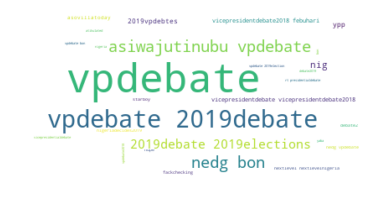

In [53]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Generate a word cloud image
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(background_color="white").generate(tags)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
hashtag_list_v2[:5]

['#vpdebate', '#…', '#nedg', '#bon', '#vpdebate']

## Basic Preprocessing

Basic Pre-processing
So far, we have learned how to extract basic features from text data. Before diving into text and feature extraction, our first step should be cleaning the data in order to obtain better features. We will achieve this by doing some of the basic pre-processing steps on our training data.

So, let’s get into it.

## Basic Text Pre-processing of text data
<ol>
<li>Lower casing</li>
<li>Punctuation removal</li>
<li>Stopwords removal</li>
<li>Frequent words removal</li>
<li>Rare words removal</li>
<li>Spelling correction</li>
<li>Tokenization</li>
<li>Stemming</li>
<li>Lemmatization</li>
</ol>

<b>1. Lower case</b></br>
The first pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [55]:
train['text'] = train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['text'].head()

0    mr peter obi remembered me of this words "he u...
1    rt @the_jonathanian: they put their best foot ...
2    rt @mr_jags: flash: vp candidate of the pdp, p...
3    rt @hedankwambo: our vice presidential candida...
4    rt @jackobinyan: pity him i beg... :) "peter o...
Name: text, dtype: object

<b>2. Removing Punctuation</b></br>
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [56]:
train['text'] = train['text'].str.replace('[^\w\s]','')
train['text'].head()

<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-56-6025edc09e6b>:1: DeprecationWarning: invalid escape sequence \w


0    mr peter obi remembered me of this words he us...
1    rt the_jonathanian they put their best foot fo...
2    rt mr_jags flash vp candidate of the pdp peter...
3    rt hedankwambo our vice presidential candidate...
4    rt jackobinyan pity him i beg  peter obi is co...
Name: text, dtype: object

<b>3. Removal of Stop Words</b></br>
As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [57]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['text'].head()

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\corpus\reader\wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Ahmed Olanrewaju\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english'>


0    mr peter obi remembered words uses statistics ...
1    rt the_jonathanian put best foot forward yemi ...
2    rt mr_jags flash vp candidate pdp peter saint ...
3    rt hedankwambo vice presidential candidate pet...
4    rt jackobinyan pity beg peter obi confusing mi...
Name: text, dtype: object

<b>4. Common word removal</b></br>
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [58]:
freq = pd.Series(' '.join(train['text']).split()).value_counts()[:10]
freq

rt          1970
vpdebate    1073
peter        976
obi          851
liar         345
vice         314
pdp          312
vp           286
osinbajo     281
kcnaija      271
dtype: int64

Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [59]:
freq = list(freq.index)
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['text'].head()

0    mr remembered words uses statistics drunken ma...
1    the_jonathanian put best foot forward yemi osi...
2    mr_jags flash candidate saint peterobi quickly...
3    hedankwambo presidential candidate obis perfor...
4    jackobinyan pity beg confusing micromanagement...
Name: text, dtype: object

<b>5. Rare words removal</b></br>
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [60]:
freq = pd.Series(' '.join(train['text']).split()).value_counts()[-10:]
freq

httpstcoto0vj8x7u3    1
appears               1
httpstcosjyhsfsgtq    1
comments              1
fifth                 1
invited               1
grouping              1
act                   1
experience            1
thi                   1
dtype: int64

In [61]:
freq = list(freq.index)
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['text'].head()


0    mr remembered words uses statistics drunken ma...
1    the_jonathanian put best foot forward yemi osi...
2    mr_jags flash candidate saint peterobi quickly...
3    hedankwambo presidential candidate obis perfor...
4    jackobinyan pity beg confusing micromanagement...
Name: text, dtype: object

<b>6. Spelling correction</b></br>
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’.

In [35]:
#from textblob import TextBlob
#train['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

<i>Note</i></br> that it will actually take a lot of time to make these corrections. Therefore, just for the purposes of learning, I have shown this technique by applying it on only the first 5 rows. Moreover, we cannot always expect it to be accurate so some care should be taken before applying it.

We should also keep in mind that words are often used in their abbreviated form. For instance, ‘your’ is used as ‘ur’. We should treat this before the spelling correction step, otherwise these words might be transformed into any other word like the one shown below:

<b>7. Tokenization</b></br>
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.



In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ahmed
[nltk_data]     Olanrewaju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
from textblob import TextBlob
TextBlob(train['text'][1]).words

WordList(['the_jonathanian', 'put', 'best', 'foot', 'forward', 'yemi', 'osibanjo', 'best', 'alas', 'ran', 'circles', 'around', 'yemi'])

<b>8. Stemming</b></br>
Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [64]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    mr rememb word use statist drunken man use lam...
1    the_jonathanian put best foot forward yemi osi...
2    mr_jag flash candid saint peterobi quickli del...
3    hedankwambo presidenti candid obi perform yest...
4    jackobinyan piti beg confus micromanag trader ...
Name: text, dtype: object

In the above output, presenting has been transformed into present, among other changes.

<b>9. Lemmatization</b></br>
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [65]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Ahmed
[nltk_data]     Olanrewaju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
from textblob import Word
train['text'] = train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['text'].head()

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1107: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Ahmed Olanrewaju\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\lexnames'>
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Ahmed Olanrewaju\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\index.adj'>
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Ahmed Olanrewaju\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\index.adv'>
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Ahmed Olanrewaju\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\index.noun'>
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\nltk\c

0    mr remembered word us statistic drunken man us...
1    the_jonathanian put best foot forward yemi osi...
2    mr_jags flash candidate saint peterobi quickly...
3    hedankwambo presidential candidate obi perform...
4    jackobinyan pity beg confusing micromanagement...
Name: text, dtype: object

## SENTIMENT ANALYSIS
https://leightley.com/sentiment-analysis-of-thameslink-tweets-using-python/


## Sorting

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 11 columns):
created_at       2051 non-null object
retweet_count    2051 non-null int64
source           2051 non-null object
text             2051 non-null object
word_count       2051 non-null int64
char_count       2051 non-null float64
avg_word         2051 non-null float64
stopwords        2051 non-null int64
hastags          2051 non-null int64
numerics         2051 non-null int64
upper            2051 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 272.3+ KB


In [68]:
train.sort_values(by='retweet_count')

,created_at,retweet_count,source,text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,2018-12-17 13:33:29,0,Twitter for Android,mr remembered word us statistic drunken man us...,23,140.0,4.833333,6,0,0,0
1028,2018-12-16 17:06:02,0,Twitter for Android,clearly demonstrate know real issue country so...,20,140.0,6.050000,8,1,0,0
1063,2018-12-16 16:54:57,0,Twitter Web Client,someone asked whether dr statistician mind,16,90.0,4.294118,8,1,0,0
1107,2018-12-16 16:36:04,0,Instagram,really angry way thing nigeria kindly repost t...,21,140.0,5.666667,6,1,0,0
1123,2018-12-16 16:28:25,0,Twitter for Android,moment drama happened cant leave shop chasing ...,19,140.0,5.619048,6,0,0,0
1155,2018-12-16 16:07:14,0,Twitter for iPhone,funny tongue twister,13,68.0,4.307692,2,1,0,4
1164,2018-12-16 16:01:09,0,Twitter for iPhone,election case team osinbajoobi v atikupmb plot...,14,89.0,5.428571,5,2,0,0
974,2018-12-16 17:43:27,0,Twitter Lite,nigeria thing rocket science 2019debate,10,73.0,6.200000,3,2,0,0
1180,2018-12-16 15:51:36,0,Twitter for Android,lols nothing person go see bearly 24hrs osiban...,20,140.0,6.050000,6,1,0,0
1200,2018-12-16 15:43:34,0,Twitter for Android,imagine peterobi profosinbajo presidential can...,18,139.0,7.176471,6,0,0,0


In [69]:
train.columns

Index(['created_at', 'retweet_count', 'source', 'text', 'word_count',
       'char_count', 'avg_word', 'stopwords', 'hastags', 'numerics', 'upper'],
      dtype='object')

In [70]:
train['RTs_binary'] = np.where(train['retweet_count']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print ( "# of tweets in dataframe:", len(train))
train[['text','retweet_count','RTs_binary']].head(5)

# of variables in dataframe: 12
# of tweets in dataframe: 2051


,text,retweet_count,RTs_binary
0,mr remembered word us statistic drunken man us...,0,0
1,the_jonathanian put best foot forward yemi osi...,91,1
2,mr_jags flash candidate saint peterobi quickly...,728,1
3,hedankwambo presidential candidate obi perform...,416,1
4,jackobinyan pity beg confusing micromanagement...,176,1


In [44]:
train['favorites_binary'] = np.where(train['favorite_count']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print  ("# of tweets in dataframe:", len(train))
train[['text','favorite_count','favorites_binary']].head(5)

# of variables in dataframe: 18
# of tweets in dataframe: 3226


,text,favorite_count,favorites_binary
0,community must ready live together peace devel...,867,1
1,commend cross river government police commend ...,3273,1
2,assure real later month celebrate 76th birthda...,2692,1
3,poor profosinbajo even deal rumour people reac...,1922,1
4,one question came meeting nigerian poland issu...,6511,1


In [71]:
# We extract the mean of lenghts
mean = np.mean(train['char_count'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 137.0185275475378


In [73]:
# We extract the tweets which were the most favourited and retweeted
#fav_max = np.max(train['favorite_count'])
rt_max  = np.max(train['retweet_count'])

#fav = train[train.favorite_count == fav_max].index[0]
rt  = train[train.retweet_count == rt_max].index[0]

# Max favorited
#print("The tweet with more likes is: \n{}".format(train['text'][fav]))
#print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(train['char_count'][fav]))
#print("{} characters.\n".format(train['created_at'][fav]))
# Max retweet


print("The tweet with more retweets is: \n{}".format(train['text'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(train['char_count'][rt]))
print("{} characters.\n".format(train['created_at'][rt]))

The tweet with more retweets is: 
realdonaldtrump hillaryclintons careless use secret server put national security risk httpstcooiaemnrgcy b
Number of retweets: 8107
140.0 characters.

2018-12-17 4:11:36 characters.



In [74]:
# We create time series by using length, likes and retweets 
tlen = pd.Series(data=train['char_count'].values, index=train['created_at'])
#tfav = pd.Series(data=train['favorite_count'].values, index=train['created_at'])
tret = pd.Series(data=train['retweet_count'].values, index=train['created_at'])

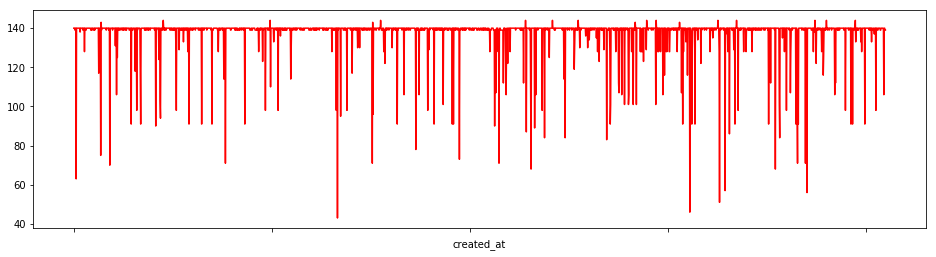

In [75]:
# Lenghts using time
tlen.plot(figsize=(16,4), color='r');

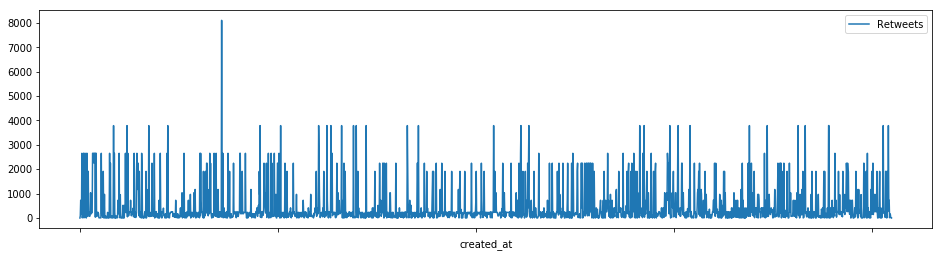

In [76]:
#And to plot the likes versus the retweets in the same chart:
# Likes vs retweets plot
#tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Pie charts of sources
The next part is to explore how Tweets are being made, as not every Tweet is sent from the same source. We do this by using the source variable.

In [77]:
# We obtain all possible sources from the data
sources = []
for source in train['source']:
    if source not in sources:
        sources.append(source)

# We print the source list
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter for iPhone
* Hootsuite Inc.
* Twitter Web Client
* Twitter Lite
* UberSocial for Android
* Mobile Web (M2)
* TweetDeck
* Twitter for iPad
* Twitter for BlackBerry
* Facebook
* Instagram


In [78]:
train['source'].value_counts()

Twitter for Android       1504
Twitter for iPhone         341
Twitter Lite               102
Twitter Web Client          59
Mobile Web (M2)             15
Twitter for iPad            14
Facebook                     6
Twitter for BlackBerry       5
TweetDeck                    2
Hootsuite Inc.               1
Instagram                    1
UberSocial for Android       1
Name: source, dtype: int64

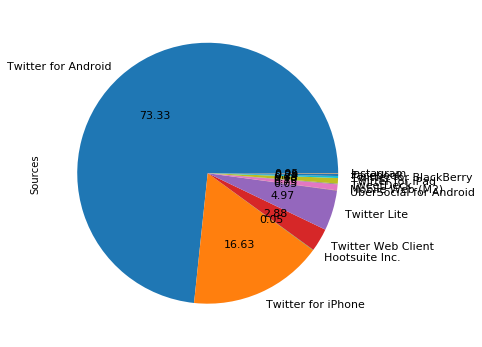

In [79]:
# We create a numpy vector and map it to the labels
percent = np.zeros(len(sources))

for source in train['source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Render the pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## Sentiment analysis
We can use TextBlob library to perform sentiment analysis. We use the re library, which uses regular expressions. This is performed in two stages:

Clean the Tweets which means that any symbol distinct to an alphanumeric value will be re-mapped into a new value;
Create the classifier to assess the popularity of each.
This is achieved as follows.

In [80]:
from textblob import TextBlob      #Import NLP package
import re                          #Import re for regex

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a Tweet by removing 
    links and special characters using regex re.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility TextBlob to classify the polarity of a Tweet
    using TextBlob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

<input>:9: DeprecationWarning: invalid escape sequence \w
<input>:9: DeprecationWarning: invalid escape sequence \w
<input>:9: DeprecationWarning: invalid escape sequence \w
<ipython-input-80-2ae436ff6b43>:9: DeprecationWarning: invalid escape sequence \w


The TextBlob comes pre-packaged with a trained classifier, which means you do not need to train, code or label any data (you can if you want to…). The TextBlob library has been designed to work with different machine learning algorithms (I’ll be posting more about this in future), and can be inter-linked with other data science and NLP packages.

When you pass each Tweet to the classifier, it assesses the sentiment as positive, negative or neutral. Once a score has been defined, a new column is created in the DataFrame.

In [81]:
# We create a column populated with the sentiment score
train['SA'] = np.array([ analize_sentiment(tweet) for tweet in train['text'] ])

# We display the DataFrame with updated score
display(train.head(10))

,created_at,retweet_count,source,text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,RTs_binary,SA
0,2018-12-17 13:33:29,0,Twitter for Android,mr remembered word us statistic drunken man us...,23,140.0,4.833333,6,0,0,0,0,0
1,2018-12-17 13:30:22,91,Twitter for Android,the_jonathanian put best foot forward yemi osi...,20,140.0,5.086957,3,0,0,1,1,1
2,2018-12-17 13:28:45,728,Twitter for Android,mr_jags flash candidate saint peterobi quickly...,22,140.0,5.409091,5,0,0,6,1,-1
3,2018-12-17 13:26:51,416,Twitter for Android,hedankwambo presidential candidate obi perform...,21,139.0,5.666667,6,1,0,1,1,1
4,2018-12-17 13:23:21,176,Twitter for Android,jackobinyan pity beg confusing micromanagement...,21,140.0,4.956522,8,1,0,2,1,-1
5,2018-12-17 13:18:54,2654,Twitter for Android,segalink major cause poverty corruption nedg b...,24,140.0,4.875000,6,3,0,5,1,1
6,2018-12-17 13:15:46,6,Twitter for Android,abazz_bdxpr speaking sense 2019debate,8,63.0,7.000000,0,2,0,1,1,0
7,2018-12-17 13:14:13,176,Twitter for Android,jackobinyan pity beg confusing micromanagement...,21,140.0,4.956522,8,1,0,2,1,-1
8,2018-12-17 13:13:31,176,Twitter for iPhone,jackobinyan pity beg confusing micromanagement...,21,140.0,4.956522,8,1,0,2,1,-1
9,2018-12-17 13:12:00,2654,Twitter for Android,segalink major cause poverty corruption nedg b...,24,140.0,4.875000,6,3,0,5,1,1


As we can see, the last column contains the sentiment score (SA).

## Analysing the results
In this post, I will provide a top-level summary of the results (I'll provide more details in a future post). This will be a percentage of the number of positive, negative or neutral Tweets.

In [82]:
# We determine the score for the Tweet
pos_tweets = [ tweet for index, tweet in enumerate(train['text']) if train['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(train['text']) if train['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(train['text']) if train['SA'][index] < 0]

# We print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(train['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(train['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(train['text'])))

Percentage of positive tweets: 38.03022915650902%
Percentage of neutral tweets: 37.298878595806926%
Percentage of negative tweets: 24.670892247684055%


## try vader analyzer

In [57]:
!pip install vaderSentiment

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [58]:
tweet = []
number_favourites = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for i in range(0, len(train)):
    tweet.append(train[i]['text'])
    number_favourites.append(train[i]['favorite_count'])
    vs_compound.append(analyzer.polarity_scores(train[i]['text'])['compound'])
    vs_pos.append(analyzer.polarity_scores(train[i]['text'])['pos'])
    vs_neu.append(analyzer.polarity_scores(train[i]['text'])['neu'])
    vs_neg.append(analyzer.polarity_scores(train[i]['text'])['neg'])

KeyError: 0

## Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

<B>Advance Text Processing</B>
<ol>
<li>N-grams</li>
<li>Term Frequency</li>
<li>Inverse Document Frequency</li>
<li>Term Frequency-Inverse Document Frequency (TF-IDF)</li>
<li>Bag of Words</li>
<li>Sentiment Analysis</li>
    <li>Word Embedding</li>


<b>1. N-grams</b></br>
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

So, let’s quickly extract bigrams from our tweets using the ngrams function of the textblob library.

In [86]:
TextBlob(train['text'][0]).ngrams(2)

[WordList(['mr', 'remembered']),
 WordList(['remembered', 'word']),
 WordList(['word', 'us']),
 WordList(['us', 'statistic']),
 WordList(['statistic', 'drunken']),
 WordList(['drunken', 'man']),
 WordList(['man', 'us']),
 WordList(['us', 'lamppost']),
 WordList(['lamppost', 'support']),
 WordList(['support', 'r']),
 WordList(['r', 'httpstcohegkfpkzuz'])]

<b>2. Term frequency</b></br>
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

<b></br>TF = (Number of times term T appears in the particular row) / (number of terms in that row)</b></br>



Below, I have tried to show you the term frequency table of a tweet.

In [87]:
tf1 = (train['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,yemi,2
1,best,2
2,ran,1
3,the_jonathanian,1
4,circle,1
5,osibanjo,1
6,foot,1
7,forward,1
8,ala,1
9,put,1


More about Term Frequency https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

<b>3. Inverse Document Frequency</b></br>
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

<b>IDF = log(N/n),</b> where, N is the total number of rows and n is the number of rows in which the word was present.

So, let’s calculate IDF for the same tweets for which we calculated the term frequency.

In [88]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['text'].str.contains(word)])))


In [89]:
tf1

,words,tf,idf
0,yemi,2,2.663238
1,best,2,2.628870
2,ran,1,2.649349
3,the_jonathanian,1,2.766270
4,circle,1,3.256635
5,osibanjo,1,3.061735
6,foot,1,3.256635
7,forward,1,3.244056
8,ala,1,3.001110
9,put,1,2.881151


The more the value of IDF, the more unique is the word.

<b>4. Term Frequency – Inverse Document Frequency (TF-IDF)</b></br>
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [90]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,yemi,2,2.663238,5.326476
1,best,2,2.628870,5.257741
2,ran,1,2.649349,2.649349
3,the_jonathanian,1,2.766270,2.766270
4,circle,1,3.256635,3.256635
5,osibanjo,1,3.061735,3.061735
6,foot,1,3.256635,3.256635
7,forward,1,3.244056,3.244056
8,ala,1,3.001110,3.001110
9,put,1,2.881151,2.881151


We can see that the TF-IDF has penalized words like ‘make’, ‘life’, and ‘member’ because they are commonly occurring words. However, it has given a high weight to “imbibed” since that will be very useful in determining the sentiment of the tweet.

We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['text'])

train_vect


C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.


<2051x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 18112 stored elements in Compressed Sparse Row format>

<b>5. Bag of Words</b></br>
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below:

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['text'])
train_bow

C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
C:\Users\Ahmed Olanrewaju\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.


<2051x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 20357 stored elements in Compressed Sparse Row format>

To gain a better understanding of this https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

<b>6. Sentiment Analysis</b></br>
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [93]:
train['text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                         (0.0, 0.0)
1                         (1.0, 0.3)
2    (-0.02291666666666669, 0.40625)
3                         (0.2, 0.5)
4        (-0.2, 0.30000000000000004)
Name: text, dtype: object

Above, you can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [94]:
train['sentiment'] = train['text'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['text','sentiment']].head()

,text,sentiment
0,mr remembered word us statistic drunken man us...,0.000000
1,the_jonathanian put best foot forward yemi osi...,1.000000
2,mr_jags flash candidate saint peterobi quickly...,-0.022917
3,hedankwambo presidential candidate obi perform...,0.200000
4,jackobinyan pity beg confusing micromanagement...,-0.200000


In [152]:

pd.pivot_table(train,index=["User"],values=["word_count"],aggfunc=np.sum)

,word_count
User,
AbujaMFA,5717
CCBNigeria,379
CIVILDEFENDERS,15478
CopyrightComm,1213
DMONigeria,6910
ENACTUSFUDMA,7170
FMEnvng,58581
FMICNigeria,61549
FMPWH,46255


In [153]:
train.groupby('User').count()

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,User - Friends,User - Favourites,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment
User,,,,,,,,,,,,,,,,,,,,,
AbujaMFA,297,297,297,297,297,297,297,297,297,76,...,297,297,297,297,297,297,297,297,297,297
CCBNigeria,29,29,29,29,29,29,29,29,29,3,...,29,29,29,29,29,29,29,29,29,29
CIVILDEFENDERS,1046,1046,1046,1046,1046,1046,1046,1046,1046,4,...,1046,1046,1046,1046,1046,1046,1046,1046,1046,1046
CopyrightComm,105,105,105,105,105,105,105,105,105,1,...,105,105,105,105,105,105,105,105,105,105
DMONigeria,424,424,424,424,424,424,424,424,424,48,...,424,424,424,424,424,424,424,424,424,424
ENACTUSFUDMA,472,472,472,472,472,472,472,472,472,270,...,472,472,472,472,472,472,472,472,472,472
FMEnvng,3157,3157,3157,3157,3157,3157,3157,3157,3157,1973,...,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157
FMICNigeria,3212,3212,3212,3212,3212,3212,3212,3212,3212,634,...,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212
FMPWH,2252,2252,2252,2252,2252,2252,2252,2252,2252,226,...,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252


In [154]:
train.columns

Index(['row ID', 'Tweet', 'Tweet ID', 'Time', 'Favorited', 'Retweeted',
       'Is Favourited', 'Is Retweeted', 'Is Retweet', 'Retweet from',
       'Latitude', 'Longitude', 'Country', 'User', 'User - Name', 'User - ID',
       'User - Description', 'User - URL', 'User - Creation time',
       'User - Language', 'User - Location', 'User - Time Zone',
       'User - Statuses', 'User - Followers', 'User - Friends',
       'User - Favourites', 'word_count', 'char_count', 'avg_word',
       'stopwords', 'hastags', 'numerics', 'upper', 'sentiment'],
      dtype='object')

<b>7. Word Embeddings</b></br>
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.
You can access the https://nlp.stanford.edu/projects/glove/

Here, we will use pre-trained word vectors which can be downloaded from the glove website. There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example, I have downloaded the 100-dimensional version of the model.

You can refer an article https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/ here to understand different form of word embeddings.

The first step here is to convert it into the word2vec format.

In [189]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

https://nlp.stanford.edu/projects/glove/

Now, we can load the above word2vec file as a model.

In [190]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

Let’s say our tweet contains a text saying ‘go away’. We can easily obtain it’s word vector using the above model:



In [191]:
model['go']

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ,  0.51755 ,  0.51998 ,
        0.15218 ,  0.41485 , -0.12377 , -0.37222 ,  0.0273  ,  0.75673 ,
       -0.8739  ,  0.58935 ,  0.46662 ,  0.62918 ,  0.092603, -0.012868,
       -0.015169,  0.25567 , -0.43025 , -0.77668 ,  0.71449 , -0.3834  ,
       -0.69638 ,  0.23522 ,  0.11396 ,  0.02778 ,  0.071357,  0.87409 ,
       -0.1281  ,  0.063576,  0.067867, -0.50181 , -0.28523 , -0.072536,
       -0.50738 , -0.6914  , -0.53579 , -0.11361 , -0.38234 , -0.12414 ,
        0.011214, -1.1622  ,  0.037057, -0.18495 ,  0.01416 ,  0.87193 ,
       -0.097309, -2.3565  , -0.14554 ,  0.28275 ,  2.0053  ,  0.23439 ,
       -0.38298 ,  0.69539 , -0.44916 , -0.094157,  0.90527 ,  0.65764 ,
        0.27628 ,  0.30688 , -0.57781 , -0.22987 , -0.083043, -0.57236 ,
       -0.299   , -0.81112 ,  0.039752, -0.05681 , -0.48879 , -0.18091 ,
       -0.28152 , -0.20559 ,  0.4932  , -0.033999, 

In [192]:
model['away']

array([-0.10379 , -0.014792,  0.59933 , -0.51316 , -0.036463,  0.6588  ,
       -0.57906 ,  0.17819 ,  0.23663 , -0.21384 ,  0.55339 ,  0.53597 ,
        0.041444,  0.16095 ,  0.017093, -0.37242 ,  0.017974,  0.39268 ,
       -0.23265 ,  0.1818  ,  0.66405 ,  0.98163 ,  0.42339 ,  0.030581,
        0.35015 ,  0.25519 , -0.71182 , -0.42184 ,  0.13068 , -0.47452 ,
       -0.08175 ,  0.1574  , -0.13262 ,  0.22679 , -0.16885 , -0.11122 ,
       -0.32272 , -0.020978, -0.43345 ,  0.172   , -0.67366 , -0.79052 ,
        0.10556 , -0.4219  , -0.12385 , -0.063486, -0.17843 ,  0.56359 ,
        0.16986 , -0.17804 ,  0.13956 , -0.20169 ,  0.078985,  1.4497  ,
        0.23556 , -2.6014  , -0.5286  , -0.11636 ,  1.7184  ,  0.33254 ,
        0.12136 ,  1.1602  , -0.2914  ,  0.47125 ,  0.41869 ,  0.35271 ,
        0.47869 , -0.042281, -0.18294 ,  0.1796  , -0.24431 , -0.34042 ,
        0.20337 , -0.93676 ,  0.013077,  0.080339, -0.36604 , -0.44005 ,
       -0.35393 ,  0.15907 ,  0.55807 ,  0.1492  , 

We then take the average to represent the string ‘go away’ in the form of vectors having 100 dimensions.



In [ ]:
(model['go'] + model['away'])/2

In [ ]:
train.describe()

In [ ]:
train.columns

In [ ]:
train.to_csv('mda_cleaned_sentiment_new.csv')

In [ ]:
train.head()

## Wordcloud

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text = train.Tweet[0]


In [ ]:
wordcloud = WordCloud().generate(text)

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [ ]:
text = " ".join(tweet for tweet in train.Tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

In [ ]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Generate a word cloud image
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(background_color="white").generate(text)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Adding Date field to the Data

In [ ]:
train.info()

## Audience Reactions on Twitter

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
train.columns

In [ ]:
train.head(1)

In [ ]:
train[['Retweeted']].describe().T
#np.round(df[['retweet_count','favorite_count']].describe(), 2).T  ##ALTERNATIVE CODE IF NOT SETTING THE FLOAT FORMAT OPTION ABOVE

In [ ]:
train.columns

In [ ]:
train['RTs_binary'] = np.where(train['Retweeted']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print ( "# of tweets in dataframe:", len(train))
train[['Tweet','Retweeted','RTs_binary']].head(5)

In [ ]:
train['favorites_binary'] = np.where(train['Favorited']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print ("# of tweets in dataframe:", len(train))
train[['Tweet','Favorited','favorites_binary']].head(5)

### Verification

Before we actually start using our new data it is critical we verify that our data transformations worked. So let's take a couple of steps using the example of our new variable `RTs_binary`. First, we're expecting a new variable with values of only 0 or 1; `value_counts()` will let us know whether the new variable has the expected values.

In [ ]:
train['RTs_binary'].value_counts()

In [ ]:
pd.crosstab(train['favorites_binary'], train['RTs_binary']).apply(lambda r: r/r.sum(), axis=0)

In [ ]:
train.plot(kind='scatter', x='favorites_binary', y='RTs_binary')

Word Frequencies

In [187]:
top_N = 5
#if not necessary all lower
a = train['Tweet'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 103699 samples and 908966 outcomes>
       Word  Frequency
0  nigerian       3238
1         u       2486
2       day       2353
3   service       2238
4   meeting       2180


In [188]:
top_N = 5
#if not necessary all lower
a = df['tag'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 5864 samples and 67036 outcomes>
            Word  Frequency
0              #      33248
1          nitda       1127
2            cbn       1009
3        nigeria        846
4  peptalk_ndlea        799
